In [133]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro , ttest_ind , stats ,chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## <center><b> Hypothesis Testing Exercise_1 </center></b>

>A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [101]:
Q1 = pd.read_csv("C:/Users/Shivani Bhavsar/OneDrive/Documents/ExcelR Assignment files/DS/A3 Hypothesis/Cutlets(1).csv")
Q1

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [102]:
Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [103]:
Q1.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


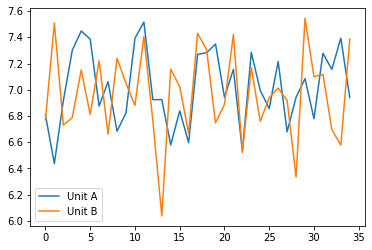

In [104]:
Q1.plot()
plt.show()

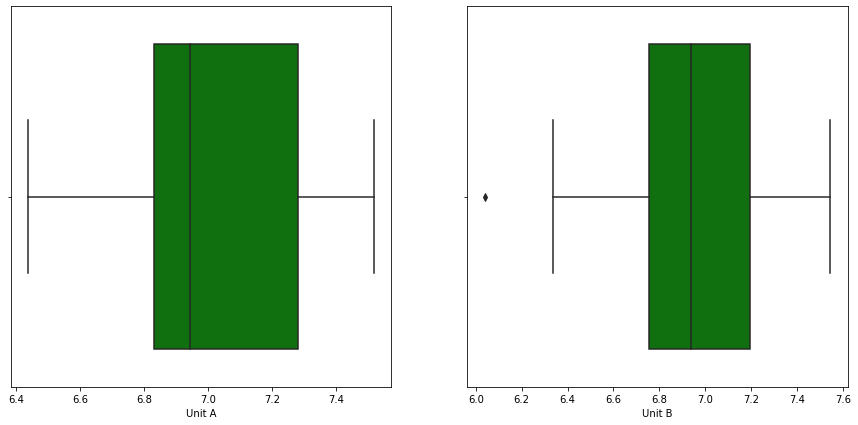

In [105]:
plt.figure(figsize =(15,7))
plt.subplot(1,2,1)
sns.boxplot(x="Unit A", data= Q1 ,color = "green")

plt.subplot(1,2,2)
sns.boxplot(x="Unit B", data= Q1 ,color = "green")

plt.show()
            

In [106]:
Q25per=Q1["Unit B"].quantile(0.25)
Q75per=Q1["Unit B"].quantile(0.75)
IQR = Q75per - Q25per
IQR


0.4413999999999998

In [107]:
Q3per = Q75per + 1.5 * IQR
Q1per= Q25per - 1.5 * IQR

In [108]:
Q3per , Q1per

(7.8571, 6.091500000000001)

In [109]:
Q1[(Q1["Unit B"] <= Q1per) |  (Q1["Unit B"] >= Q3per)]

,Unit A,Unit B
13,6.9256,6.038


<Figure size 1440x1440 with 0 Axes>

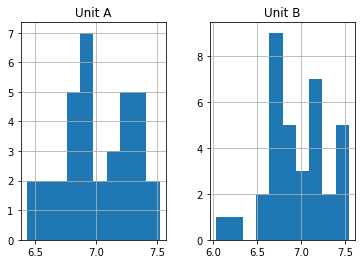

In [110]:
plt.figure(figsize = (20,20))
Q1.hist()
plt.show()

# Normality Test :
  >H0 : The data is normal.
  
  >H1 : The data is not normal.

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


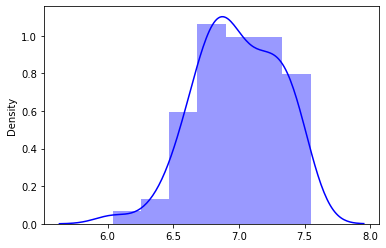

In [111]:
sns.distplot(Q1, kde=True, color = "blue")
plt.show()

In [113]:
shapiro(Q1)

ShapiroResult(statistic=0.9762489795684814, pvalue=0.2044535130262375)

>Here, p-value is 0.2044 > 0.05 , so we does not reject the H0 and conclude that the data is normal.

>Here, Data is normal so we will use Parametric test for hypothesis testing

---
## Independent t-test
----

>H0 : There is no significance difference between diameter of the Culets


>H1 : There is a significance difference between diameter of the Culets

In [114]:
ttest_ind(Q1["Unit A"],Q1["Unit B"] )

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.47223947245995)

>Here, p-value is 0.4722 > 0.05 , so we does not reject the H0 and conclude that There is no significance difference between diameter of the Culets.

#  Hypothesis Testing Exercise_2

>A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [115]:
Q2 = pd.read_csv("C:/Users/Shivani Bhavsar/OneDrive/Documents/ExcelR Assignment files/DS/A3 Hypothesis/LabTAT.csv")
Q2

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [116]:
Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [117]:
Q2.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


array([[<AxesSubplot:title={'center':'Laboratory 1'}>,
        <AxesSubplot:title={'center':'Laboratory 2'}>],
       [<AxesSubplot:title={'center':'Laboratory 3'}>,
        <AxesSubplot:title={'center':'Laboratory 4'}>]], dtype=object)

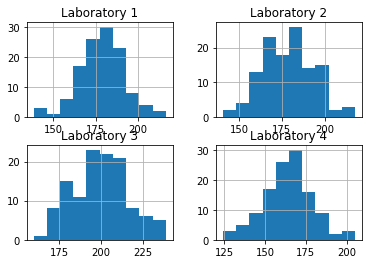

In [118]:
Q2.hist()

# Normality Test :
  >H0 : The data is normal.
  
  >H1 : The data is not normal.

C:\Users\Shivani Bhavsar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

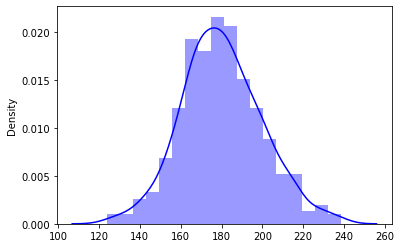

In [119]:
sns.distplot(Q2, kde=True, color = "blue" )

In [120]:
shapiro(Q2)

ShapiroResult(statistic=0.9949412941932678, pvalue=0.11753447353839874)

>Here, p-value is 0.1175 > 0.05 , so we does not reject the H0 and conclude that the data is normal.

# Anova
---

>H0 : There is no significance difference among TAT of the laboratories

>H1 : There is a significance difference between any pair of TAT of the laboratories

In [121]:
stats.f_oneway(Q2["Laboratory 1"], Q2["Laboratory 2"], Q2["Laboratory 3"], Q2["Laboratory 4"])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

>Here , P-value 0.0000 < 0.05 at 5% level of significance so we reject the null hypothesis and conclude that There is significance difference between any one pair of TAT Laboratories.

# Hypothesis Testing Exercise_3

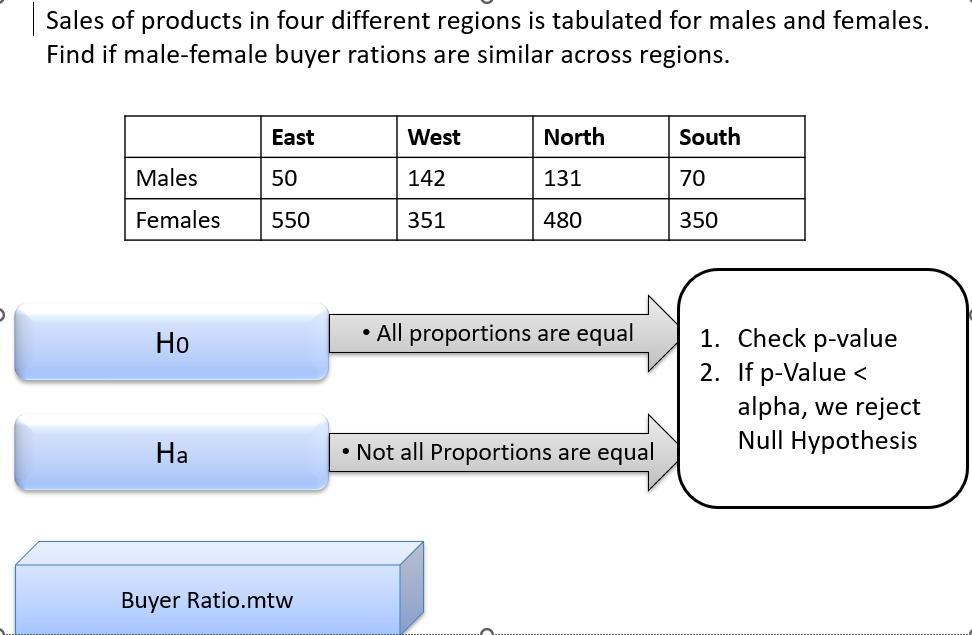

In [122]:
Q3 = pd.read_csv("C:/Users/Shivani Bhavsar/OneDrive/Documents/ExcelR Assignment files/DS/A3 Hypothesis/BuyerRatio.csv")
Q3

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [168]:
Q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


# Chi-Square Test


>H0 : The male-female buyer rations are similar across regions

>H1 : The male-female buyer rations are not similar across regions

In [136]:
chi2_contingency([Q3["East"], Q3["West"], Q3["North"], Q3["South"]])

(1.5959455386610577,
 0.6603094907091882,
 3,
 array([[  42.76531299,  442.23468701],
        [ 146.81287862, 1518.18712138],
        [ 131.11756787, 1355.88243213],
        [  72.30424052,  747.69575948]]))

>Here, P-value 0.660309 > 0.05.so we do not reject the null hypothesis at 5% level of significance and conclude that the male-female ratio are similar across regions.

# Hypothesis Testing Exercise_4

>TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

In [148]:
Q4 = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A3 Hypothesis\\Costomer+OrderForm.csv")
Q4

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [149]:
Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [151]:
Q4.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [163]:
Q4["Phillippines"].unique(),
Q4["Indonesia"].unique(),
Q4["Malta"].unique(),
Q4["India"].unique()

array(['Error Free', 'Defective'], dtype=object)

# Chi-Square Test

---


> H0 : The defective % does not varies by centre

> H1 : The defective % does varies by centre

In [167]:
chi2_contingency([Q4['Phillippines'].value_counts(), Q4['Indonesia'].value_counts(), Q4['Malta'].value_counts(), Q4['India'].value_counts()])

(3.8589606858203545,
 0.2771020991233144,
 3,
 array([[271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25]]))

>Here, P-value 0.277102 > 0.05.so, we do not reject the null hypothesis at 5% level of significance and may conclude that the defective % does not vary by centres.